### Mike Ogrysko
### CS 737 Machine Learning
Image classification using TensorFlow

- Intel image dataset from Kaggle - https://www.kaggle.com/puneet6060/intel-image-classification
- OpenCV image feature extraction library - https://docs.opencv.org/3.4.10/
- Identification of color channels
- TensorFlow convolutional neural network
- Addition of regularization

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import datetime
import struct
import tensorflow as tf

2022-12-29 20:49:36.132105: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#training and test lists of X and y
X_tr, y_tr, X_ts, y_ts = [], [], [], []
#paths for training and test sets
trainPath = "archive/seg_train/seg_train/"
testPath = "archive/seg_test/seg_test/"
#set image size
IMGSIZE = (128, 128)
#set class names
CNAMES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
#for each label
for label in CNAMES:
    #build a path
    tr_path = trainPath + label
    #for each image in path
    for f in sorted([_ for _ in os.listdir(tr_path) if _.lower().endswith('.jpg')]):
        #resize the file given the defined image size and store in X
        X_tr += [cv2.resize(cv2.imread(os.path.join(tr_path,f)), IMGSIZE)]
        #store the corresponding label index in y
        y_tr += [CNAMES.index(label)]
    ts_path = testPath + label
    #for each image in path
    for f in sorted([_ for _ in os.listdir(ts_path) if _.lower().endswith('.jpg')]):
        #resize the file given the defined image size and store in X
        X_ts += [cv2.resize(cv2.imread(os.path.join(ts_path,f)), IMGSIZE)] 
        #store the corresponding label index in y
        y_ts += [CNAMES.index(label)]

#confirm lengths of training set X and y
print("Training set X: ", len(X_tr))
print("Training set y: ", len(y_tr))


Training set X:  14034
Training set y:  14034


In [3]:
#confirm lengths of test set X and y
print("Testing set X: ", len(X_ts))
print("Testing set y: ", len(y_ts))


Testing set X:  3000
Testing set y:  3000


**Identification of color channels**

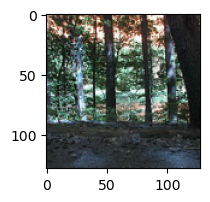

Height:  128
Width:  128
Channels:  3
Label:  forest


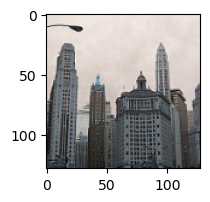

Height:  128
Width:  128
Channels:  3
Label:  buildings


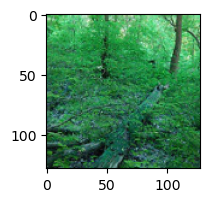

Height:  128
Width:  128
Channels:  3
Label:  forest


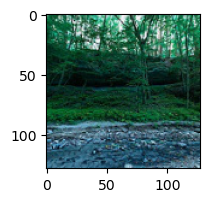

Height:  128
Width:  128
Channels:  3
Label:  forest


In [4]:
#display images
#set batch size
batch = 4
for i in range(batch):
    #get random number from trainSet
    n = random.randint(0,len(X_tr)-1)
    #set image size
    plt.figure(figsize=(2,2))
    #show image
    plt.imshow(X_tr[n])
    plt.show()
    #show dimensions and channels
    print('Height: ', X_tr[n].shape[0])
    print('Width: ', X_tr[n].shape[1])
    print('Channels: ', X_tr[n].shape[2])
    #show labels
    print('Label: ', CNAMES[y_tr[n]])


In [5]:
np_trainSet_X = np.array(X_tr)
np_trainSet_y = np.array(y_tr)
np_testSet_X = np.array(X_ts)
np_testSet_y = np.array(y_ts)

In [6]:
print(np_trainSet_X.shape)
print(np_trainSet_y.shape)
print(np_testSet_X.shape)
print(np_testSet_y.shape)

(14034, 128, 128, 3)
(14034,)
(3000, 128, 128, 3)
(3000,)


In [7]:
np_trainSet_X[:,:,:,0].max()

255

In [8]:
np_trainSet_X[:,:,:,0].min()

0

In [9]:
#scale image set
np_trainSet_X = np_trainSet_X/255.0
np_testSet_X = np_testSet_X/255.0

In [10]:
#confirm std max
np_trainSet_X[:,:,:,0].max()

1.0

In [11]:
#confirm std min
np_trainSet_X[:,:,:,0].min()

0.0

**TensorFlow Convolutional Neural Network**

In [12]:
# Clear session
tf.keras.backend.clear_session()

In [13]:
#nn 
# Our full CNN neural network
cnn1 = tf.keras.Sequential()

# if necessary keep the image size same padding='same'
cnn1.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5),
    data_format='channels_last',
    name='conv_1', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))  # 12x12 image size

# if necessary keep the image size same padding='same'
cnn1.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5),
    name='conv_2', activation='relu'))

cnn1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))  # 4x4 image size

# parameter size computed from the previous image sizes and pooling layers
cnn1.add(tf.keras.layers.Flatten())

cnn1.add(tf.keras.layers.Dense(units=256, name='fc_1', activation='relu'))

cnn1.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))


2022-12-29 20:51:47.318655: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
#nn
# Set a seed for repeatibility
tf.random.set_seed(0)

# Build the model
cnn1.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn1.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 10

In [15]:
#nn
# Save weights for debugging purposes and saving the model
cnn1.save_weights('cnn1_weights.h5')

In [16]:
%%time
history = cnn1.fit(np_trainSet_X, np_trainSet_y,epochs=NUM_EPOCHS,shuffle=True)

Epoch 1/10
439/439 [==============================] - 46s 104ms/step - loss: 0.9629 - accuracy: 0.6358
Epoch 2/10
439/439 [==============================] - 46s 105ms/step - loss: 0.6566 - accuracy: 0.7630
Epoch 3/10
439/439 [==============================] - 46s 105ms/step - loss: 0.4588 - accuracy: 0.8370
Epoch 4/10
439/439 [==============================] - 46s 105ms/step - loss: 0.2735 - accuracy: 0.9058
Epoch 5/10
439/439 [==============================] - 47s 107ms/step - loss: 0.1420 - accuracy: 0.9532
Epoch 6/10
439/439 [==============================] - 47s 107ms/step - loss: 0.0836 - accuracy: 0.9736
Epoch 7/10
439/439 [==============================] - 47s 106ms/step - loss: 0.0638 - accuracy: 0.9825
Epoch 8/10
439/439 [==============================] - 47s 107ms/step - loss: 0.0721 - accuracy: 0.9771
Epoch 9/10
439/439 [==============================] - 46s 106ms/step - loss: 0.0557 - accuracy: 0.9833
Epoch 10/10
439/439 [==============================] - 47s 106ms/step - l

In [17]:
# Testing dataset
y_pred = np.argmax(cnn1.predict(np_testSet_X), axis=1)
print(f'Accuracy= {sum(y_pred==np_testSet_y)/len(np_testSet_X):.3f}')

94/94 [==============================] - 3s 27ms/step
Accuracy= 0.743


**Addition of regularization**

In [18]:
# Clear session
tf.keras.backend.clear_session()
#nn from mod 14 notebook - modified for regaularization
# Our full CNN neural network
cnn2 = tf.keras.Sequential()

# if necessary keep the image size same padding='same'
cnn2.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), data_format='channels_last', name='conv_1', activation='relu'))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_1'))  # 12x12 image size

# if necessary keep the image size same padding='same'
cnn2.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), name='conv_2', activation='relu'))#, kernel_regularizer=tf.keras.regularizers.l2(l=0.005)))
#add dropout
cnn2.add(tf.keras.layers.Dropout(0.1))
cnn2.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), name='pool_2'))  # 4x4 image size

# parameter size computed from the previous image sizes and pooling layers
cnn2.add(tf.keras.layers.Flatten())

cnn2.add(tf.keras.layers.Dense(units=256, name='fc_1', activation='relu'))#, kernel_regularizer=tf.keras.regularizers.l2(l=0.005)))
#Add dropout
cnn2.add(tf.keras.layers.Dropout(0.1))
cnn2.add(tf.keras.layers.Dense(units=10, name='fc_2', activation='softmax'))

# Set a seed for repeatibility
tf.random.set_seed(0)

# Build the model
cnn2.build(input_shape=(None, 128, 128, 3))

# Compile the model with the optimizer, loss function and metric
cnn2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy'])

NUM_EPOCHS = 10

# Save weights for debugging purposes and saving the model
cnn2.save_weights('cnn1_weights.h5')



In [19]:
%%time
history = cnn2.fit(np_trainSet_X, np_trainSet_y,epochs=NUM_EPOCHS,shuffle=True)

Epoch 1/10
439/439 [==============================] - 48s 108ms/step - loss: 0.9596 - accuracy: 0.6425
Epoch 2/10
439/439 [==============================] - 48s 109ms/step - loss: 0.6617 - accuracy: 0.7597
Epoch 3/10
439/439 [==============================] - 48s 110ms/step - loss: 0.4684 - accuracy: 0.8306
Epoch 4/10
439/439 [==============================] - 50s 114ms/step - loss: 0.2870 - accuracy: 0.9009
Epoch 5/10
439/439 [==============================] - 49s 112ms/step - loss: 0.1825 - accuracy: 0.9373
Epoch 6/10
439/439 [==============================] - 49s 112ms/step - loss: 0.1036 - accuracy: 0.9647
Epoch 7/10
439/439 [==============================] - 48s 110ms/step - loss: 0.0845 - accuracy: 0.9729
Epoch 8/10
439/439 [==============================] - 48s 109ms/step - loss: 0.0758 - accuracy: 0.9768
Epoch 9/10
439/439 [==============================] - 48s 109ms/step - loss: 0.0754 - accuracy: 0.9778
Epoch 10/10
439/439 [==============================] - 48s 109ms/step - l

In [20]:
# Testing dataset
y_pred_reg = np.argmax(cnn2.predict(np_testSet_X), axis=1)
print(f'Accuracy= {sum(y_pred_reg==np_testSet_y)/len(np_testSet_X):.3f}')

94/94 [==============================] - 3s 27ms/step
Accuracy= 0.771
